In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("titanic_train1.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

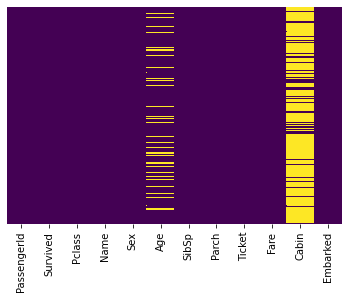

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#roughly 20% of the age data is missing but we r missing too much cabin value so we r probably drop it

<AxesSubplot:xlabel='Survived', ylabel='count'>

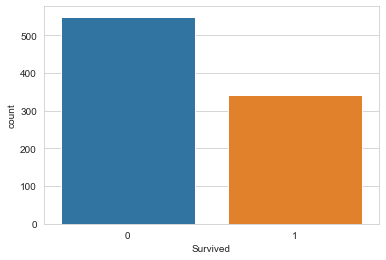

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

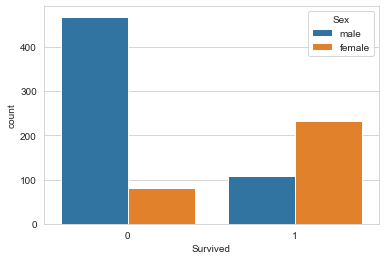

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

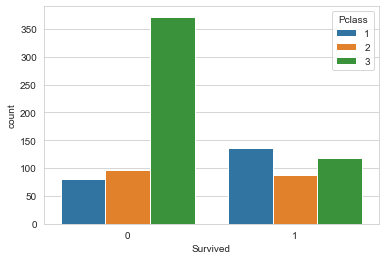

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

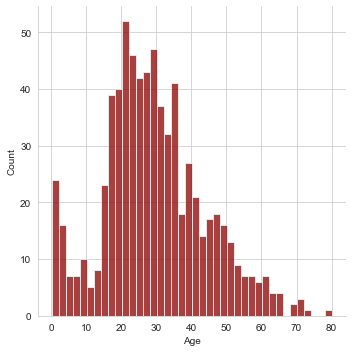

In [13]:
sns.displot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

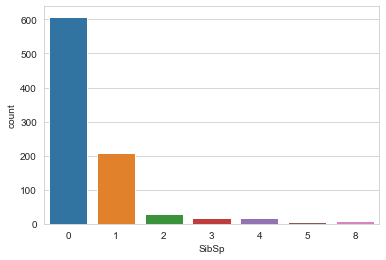

In [14]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:>

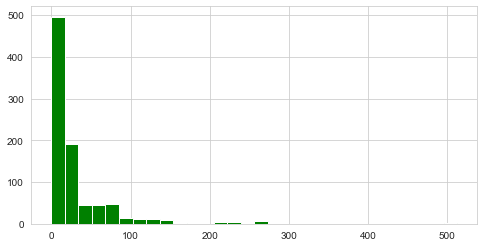

In [15]:
df['Fare'].hist(color='green',bins=30,figsize=(8,4))

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

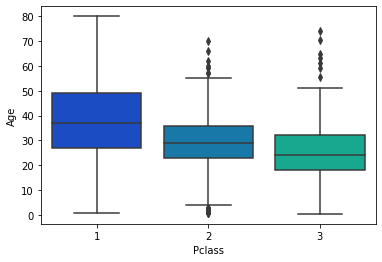

In [9]:

sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [10]:
df.drop('Cabin',axis=1,inplace=True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
sum(df['Age'].isnull())

177

In [13]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
print(df['Embarked'].mode())

0    S
dtype: object


In [16]:
print(df['Embarked'].mode()[0])

S


In [17]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

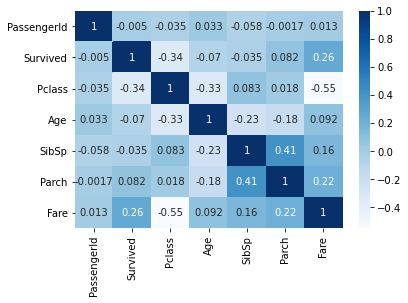

In [22]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

#Encoding the categorical value

In [23]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [26]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,1


In [27]:
df.drop('Name',axis=1,inplace=True)

In [28]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [29]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex            0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.543397
dtype: float64

In [48]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(891, 8)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [32]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [33]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.000000,1,0,523.0,7.2500,0
1,2,1,1,1,38.000000,1,0,596.0,71.2833,1
2,3,1,3,1,26.000000,0,0,669.0,7.9250,0
3,4,1,1,1,35.000000,1,0,49.0,53.1000,0
4,5,0,3,0,35.000000,0,0,472.0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,101.0,13.0000,0
887,888,1,1,1,19.000000,0,0,14.0,30.0000,0
888,889,0,3,1,29.699118,1,2,675.0,23.4500,0
889,890,1,1,0,26.000000,0,0,8.0,30.0000,1


In [49]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([6, 5, 6, 7, 5, 5, 5, 5, 6, 7, 4, 4, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 7, 5, 7, 6, 7, 7, 5, 6, 6, 7, 5, 4, 7, 5, 5, 7, 6,
       6, 4, 6, 4, 6, 7, 5, 5, 7, 7, 7, 7, 6, 7, 7, 4, 6, 7, 5, 5, 5, 5,
       5, 5, 4, 6, 5, 6], dtype=int64))


In [50]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000
887,888,1,1,1,19.000000,0,0,30.0000
888,889,0,3,1,29.699118,1,2,23.4500
889,890,1,1,0,26.000000,0,0,30.0000


In [51]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 8)
(820, 8)


In [52]:
loss_percent=((891-820)/891)*100
print(loss_percent)

7.968574635241302


In [46]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15631324, -0.8       ,  0.87283049, ..., -0.48469263,
         0.93404121, -0.83470177],
       [-2.14032052,  1.25      , -1.47067587, ..., -0.48469263,
         1.21487665,  1.55364494],
       [-2.12579352,  1.25      ,  0.87283049, ..., -0.48469263,
         1.48411797, -0.74331399],
       ...,
       [ 1.56705476, -0.8       ,  0.87283049, ...,  2.08665417,
         1.50578647,  0.39490799],
       [ 1.57009584,  1.25      , -1.47067587, ..., -0.48469263,
        -1.99052285,  0.65432009],
       [ 1.57313595, -0.8       ,  0.87283049, ..., -0.48469263,
         0.70528334, -0.76629016]])

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.15631324, -0.8       ,  0.87283049, ..., -0.48469263,
         0.93404121, -0.83470177],
       [-2.14032052,  1.25      , -1.47067587, ..., -0.48469263,
         1.21487665,  1.55364494],
       [-2.12579352,  1.25      ,  0.87283049, ..., -0.48469263,
         1.48411797, -0.74331399],
       ...,
       [ 1.56705476, -0.8       ,  0.87283049, ...,  2.08665417,
         1.50578647,  0.39490799],
       [ 1.57009584,  1.25      , -1.47067587, ..., -0.48469263,
        -1.99052285,  0.65432009],
       [ 1.57313595, -0.8       ,  0.87283049, ..., -0.48469263,
         0.70528334, -0.76629016]])

In [45]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [44]:
df=df.drop(["Ticket","Embarked",],axis=1)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000
887,888,1,1,1,19.000000,0,0,30.0000
888,889,0,3,1,29.699118,1,2,23.4500
889,890,1,1,0,26.000000,0,0,30.0000


# Model Building

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [54]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state" ,i, "the model performs very well")
        print("At random state:-" ,i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100)
        print("Training r2_score is:-",accuracy_score(y_test,pred_test)*100)

At random state 8 the model performs very well
At random state:- 8
Training r2_score is:- 72.5609756097561
Training r2_score is:- 72.5609756097561
At random state 114 the model performs very well
At random state:- 114
Training r2_score is:- 72.5609756097561
Training r2_score is:- 72.5609756097561
At random state 210 the model performs very well
At random state:- 210
Training r2_score is:- 73.17073170731707
Training r2_score is:- 73.17073170731707
At random state 391 the model performs very well
At random state:- 391
Training r2_score is:- 73.17073170731707
Training r2_score is:- 73.17073170731707
At random state 686 the model performs very well
At random state:- 686
Training r2_score is:- 72.5609756097561
Training r2_score is:- 72.5609756097561
At random state 702 the model performs very well
At random state:- 702
Training r2_score is:- 71.95121951219512
Training r2_score is:- 71.95121951219512
At random state 819 the model performs very well
At random state:- 819
Training r2_score is:

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=8)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       120
           1       0.00      0.00      0.00        32
           2       0.50      0.08      0.14        12

    accuracy                           0.73       164
   macro avg       0.41      0.36      0.33       164
weighted avg       0.57      0.73      0.63       164



# Cross validation check

In [58]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 70.24390243902438
accuracy_score is :- 72.5609756097561


At cv:- 3
Cross validation score is:- 72.0729392262239
accuracy_score is :- 72.5609756097561


At cv:- 4
Cross validation score is:- 72.3170731707317
accuracy_score is :- 72.5609756097561


At cv:- 5
Cross validation score is:- 72.4390243902439
accuracy_score is :- 72.5609756097561


At cv:- 6
Cross validation score is:- 72.31555030771433
accuracy_score is :- 72.5609756097561


At cv:- 7
Cross validation score is:- 72.07218393659073
accuracy_score is :- 72.5609756097561


At cv:- 8
Cross validation score is:- 71.82681324957167
accuracy_score is :- 72.5609756097561


At cv:- 9
Cross validation score is:- 72.0722514200775
accuracy_score is :- 72.5609756097561




In [59]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is: 0.724390243902439 
The accuracy score is:  0.725609756097561


In [61]:
import pickle
filename='titanic.pkl'
pickle.dump(lr,open(filename,'wb'))